<a href="https://colab.research.google.com/github/manojkumarshenu/manojkumarshenu/blob/main/Hotel_Booking_Analysis_EDAipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis of Hotel booking -A Case Study**

Project Type - EDA

Contribution -Group Project

Team Mamber:-

1.Manoj kumar (manojkumarshenu@gmail.com)

2.Kapil Raj (kpkp0709@gmail.com)

3.Snehal Jadhav (jadhavs9156@gmail.com)

4.Dipa (dipadeka13@gmail.com)

# **Objective :**

We are provided with Hotel booking dataset.
Our main objective is to perform EDA on the given dataset and draw useful conclusions about general trends in hotel bookings and the factors governing hotel bookings interact with each other.

#**Project Summary:-**

Hotel industry is a very volatile industry and the bookings depend on variety of factors such as type of hotels, seasonality, days of week ,ratings, avilability of room ,parking space and many more. This makes analyzing the patterns available in the past data more important to help the hotels plan better. Using the historical data, hotels can perform various campaigns to boost the business. We can use the past data to predict the future bookings.

We will be using the data available to analyze the factors affecting the hotel bookings. These factors can be used for reporting the trends and predict the future bookings.

We will be tackling this problem statement in three stages:

1.We will be analyzing some key metrics for hotel bookings like:

*  Hotels available for booking

* Number of bookings on weekday vs weekends

* Most preferred meal types

* Country wise bookings

* New customers acquired

* Customer lifetime value of the existing customers

* Type of rooms preferred by customers

* Booking types

* The number of cancellations

* The revenue of the hotels

2.We will be using various lenses to look through the data to analyze patterns associated with each segment such as:

* The type of hotel

* Day of week

* Type of customers

* Type of rooms

3.Finally, we will also try to predict the future bookings either based on time series analysis or decision trees.

Using the results from the above analysis, business can make key decisions regarding the customer experience they desire to deliver.




# **GitHub Link -**


# **1. Know Your Data:-**

# Import Libraries:-

In [ ]:
# Insert the Standard Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Loading:-

**Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**CSV File location**

In [ ]:
#Load the Data
df=pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Data preprocessing:-




*  In the data preprocessing phase ,we frist examined the shape of the data to understand its dimensions.
*  Next,we checked for null values in the dataset and removed them if any are found.


*  Additionally ,we performed a check for duplicate values and replaced them to ensure data integrity.

*  To gain insights into the relationship between different variables,we visualized the correlation map using a heatmap.This visualization allowed us to identify patterns and dependencies among the features in the dataset,helping us understand the interplay between various attribute.





In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#Checking the data shape
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#**Data Description:**

It contains the following features.

- hotel: Name of hotel ( City or Resort)
- is_canceled: Whether the booking is canceled or not (0 for no canceled and 1 for canceled)
- lead_time: time (in days) between booking transaction and actual arrival.
- arrival_date_year: Year of arrival
- arrival_date_month: month of arrival
- arrival_date_week_number: week number of arrival date.
- arrival_date_day_of_month: Day of month of arrival date
- stays_in_weekend_nights: No. of weekend nights spent in a hotel
- stays_in_week_nights: No. of weeknights spent in a hotel
- adults: No. of adults in single booking record.
- children: No. of children in single booking record.
- babies: No. of babies in single booking record.
- meal: Type of meal chosen
- country: Country of origin of customers (as mentioned by them)
- market_segment: What segment via booking was made and for what purpose.
- distribution_channel: Via which medium booking was made.
- is_repeated_guest: Whether the customer has made any booking before(0 for No and 1 for Yes)
- previous_cancellations: No. of previous canceled bookings.
- previous_bookings_not_canceled: No. of previous non-canceled bookings.
- reserved_room_type: Room type reserved by a customer.
- assigned_room_type: Room type assigned to the customer.
- booking_changes: No. of booking changes done by customers
- deposit_type: Type of deposit at the time of making a booking (No deposit/ Refundable/ No refund)
- agent: Id of agent for booking
- company: Id of the company making a booking
- days_in_waiting_list: No. of days on waiting list.
- customer_type: Type of customer(Transient, Group, etc.)
- adr: Average Daily rate.
- required_car_parking_spaces: No. of car parking asked in booking
- total_of_special_requests: total no. of special request.
- reservation_status: Whether a customer has checked out or canceled,or not showed
- reservation_status_date: Date of making reservation status.

#**Data cleaning**

In [ ]:
#Copy the data file in a new variable
hotel_df=df.copy()

In [ ]:
#checking for duplicate rows
hotel_df.duplicated().value_counts()

False    87396
True     31994
dtype: int64

# **Visualization of duplicate values through count plot**

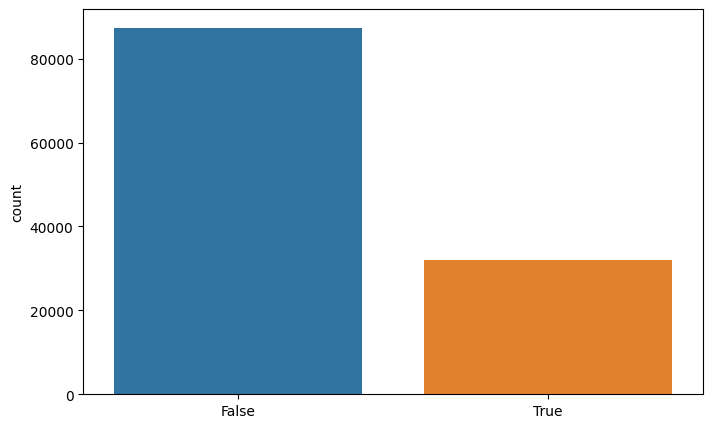

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=hotel_df.duplicated())
plt.show()

In [ ]:
#Drop the duplicates values from data
hotel_df.drop_duplicates(inplace = True)
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#After droping values the shape of data
hotel_df.shape

(87396, 32)

#**Checking Missing values/Null Values**

In [ ]:
print(hotel_df.isnull().sum().sort_values(ascending=False))

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


# **Visualizing null values through Heatmap**

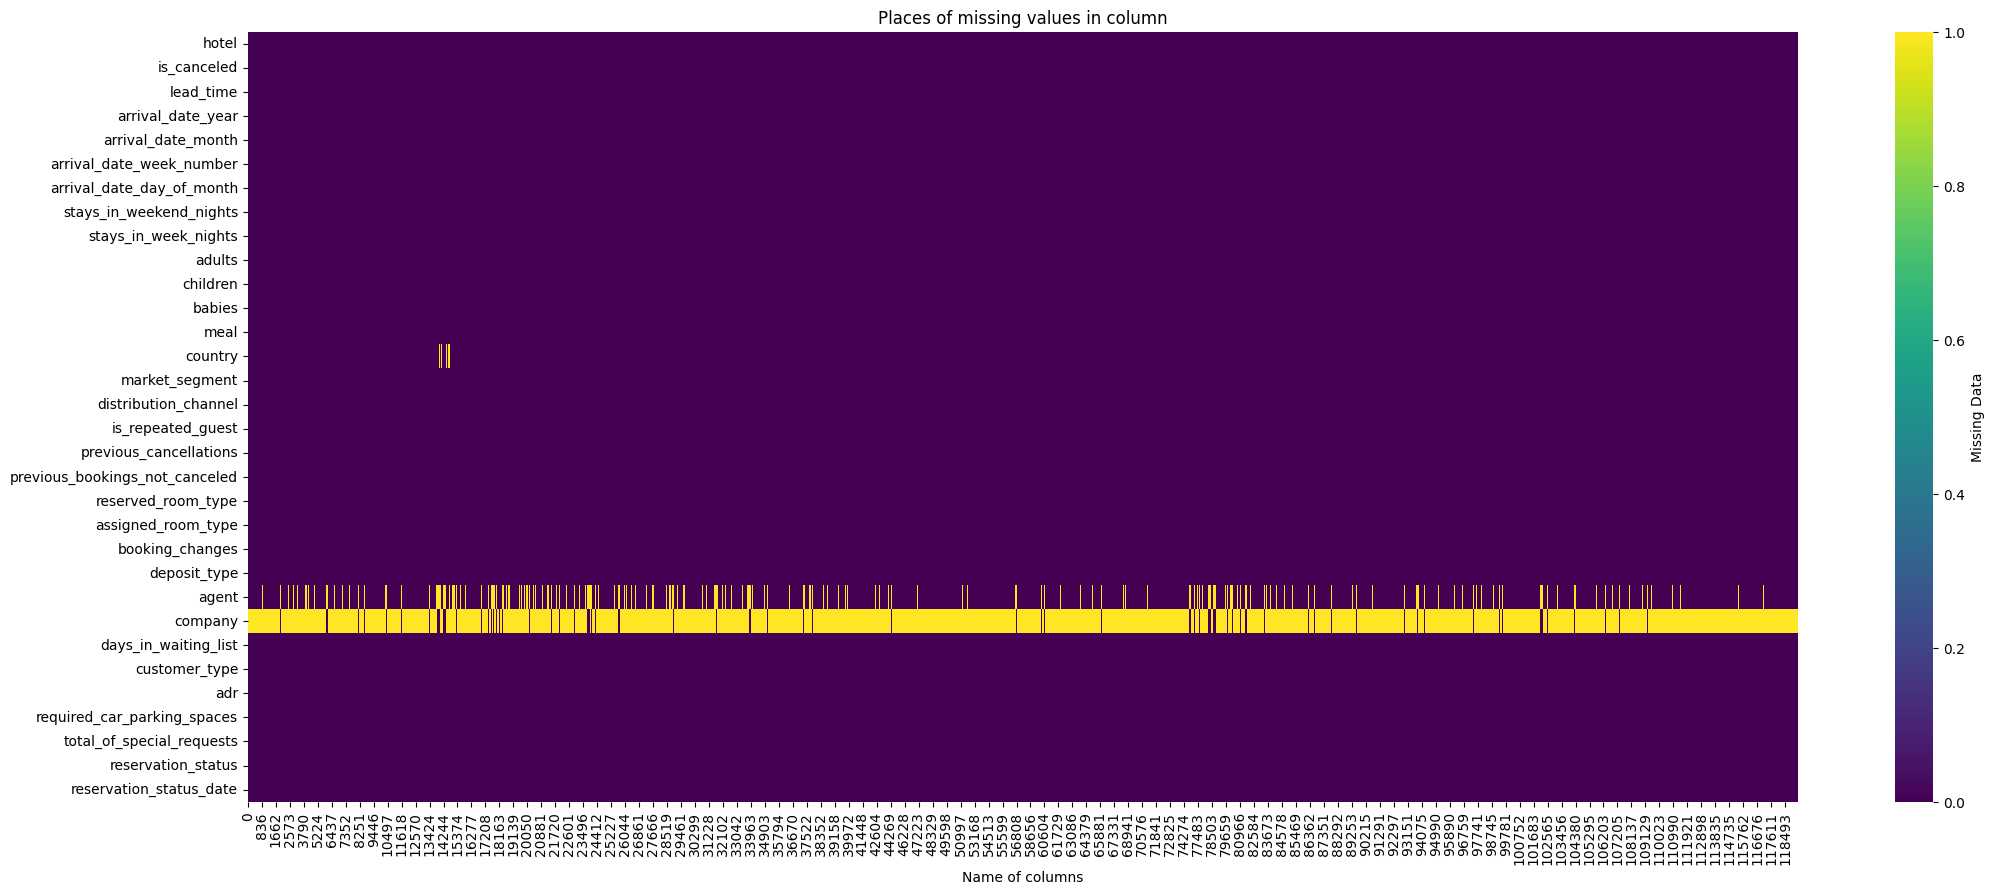

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(hotel_df.isnull().transpose(),cbar_kws=({'label': 'Missing Data'}), cmap='viridis')
plt.xlabel("Name of columns")
plt.title("Places of missing values in column")
plt.show()

In [ ]:
#Fill null values
hotel_df['company']=hotel_df['company'].fillna('unknow')
hotel_df['agent']=hotel_df['agent'].fillna('unknow')
hotel_df.dropna(inplace=True)

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86940 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86940 non-null  object 
 1   is_canceled                     86940 non-null  int64  
 2   lead_time                       86940 non-null  int64  
 3   arrival_date_year               86940 non-null  int64  
 4   arrival_date_month              86940 non-null  object 
 5   arrival_date_week_number        86940 non-null  int64  
 6   arrival_date_day_of_month       86940 non-null  int64  
 7   stays_in_weekend_nights         86940 non-null  int64  
 8   stays_in_week_nights            86940 non-null  int64  
 9   adults                          86940 non-null  int64  
 10  children                        86940 non-null  float64
 11  babies                          86940 non-null  int64  
 12  meal                           

In [ ]:
#Final shape of data after cleaning
hotel_df.shape

(87396, 32)

In [ ]:
#Stastic about the dataset
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#Problem statement:

#**1.** Which type of  hotel have more no of booking?

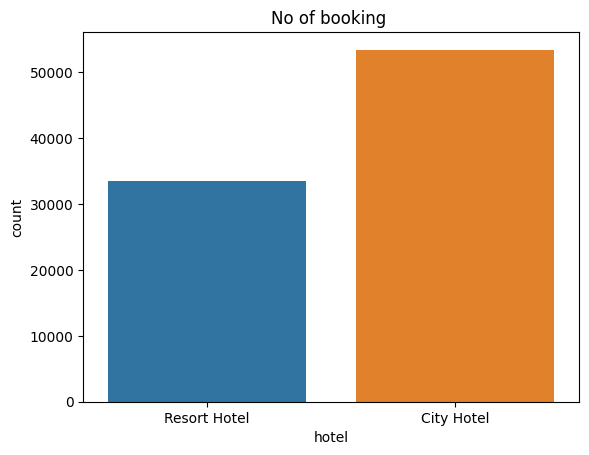

In [ ]:
sns.countplot(data=hotel_df,x='hotel')
plt.title('No of booking ')
plt.show()

In the above graph we can easily see that Resort hotel has less no of booking campare to City hotel.


#**2**. Which type of hotel is mostly prefered by the guests?

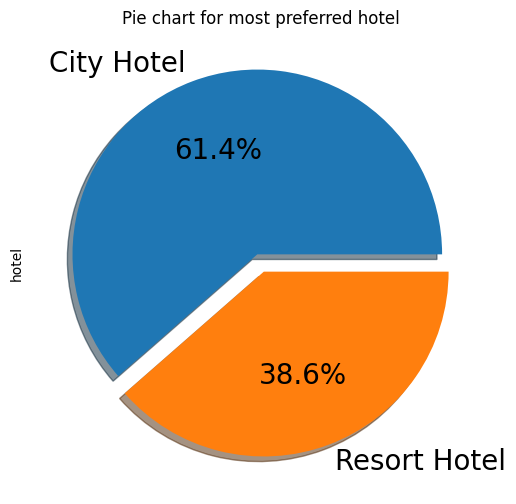

In [ ]:
hotel_df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%',shadow=True,figsize=(8,6),fontsize=20)
plt.title('Pie chart for most preferred hotel')
plt.show()

City hotel is most preferred hotel by guests. Thus, City hotels has maximum bookings.
61.4% guests prefeered city Hotels while only 38.6% guests have shown interest in resort hotel.

#**3**.**What is the Percentage of Repeated Guests?**



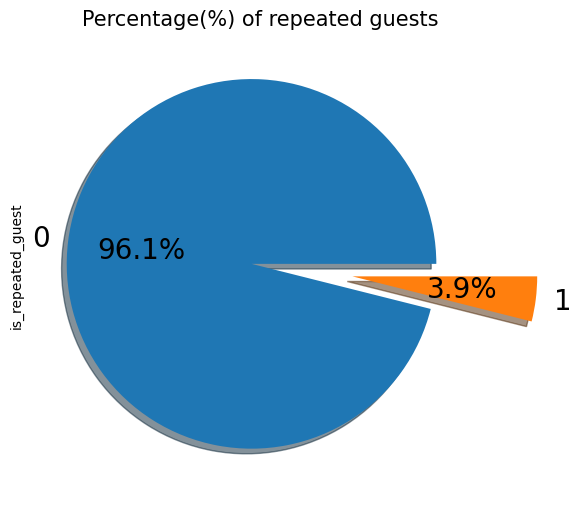

In [ ]:
import matplotlib.pyplot as plt
hotel_df['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.5),autopct='%1.1f%%',shadow=True, figsize=(10,6),fontsize=20)
plt.title("Percentage(%) of repeated guests", fontsize=15)
plt.show()

**Observation**:
Repeated guests are very less which is only 3.9% while 96.1% guests are not returning to the same hotel. In order to retain the guests, management should take feedback from the guests.

#**5**.Which year has highest and lowest bookings?

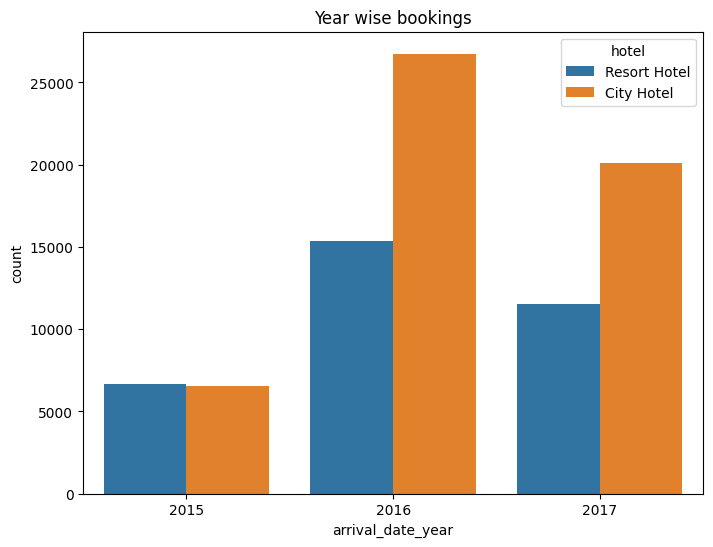

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=hotel_df['arrival_date_year'],hue=hotel_df['hotel'])
plt.title("Year wise bookings")
plt.show()

**Observation:**

*   From the above visualization we found that hotels was booked mostly in the year 2016. Stakeholders can now figure out what went wrong after 2016 and fixed that problem to increase the number of bookings. One way to do this is to ask for feedback from the guests and have a meeting with the old employees who were serving in the year 2016.
*   2015 has the least bookings.







# **6. Plotting Pairplot**

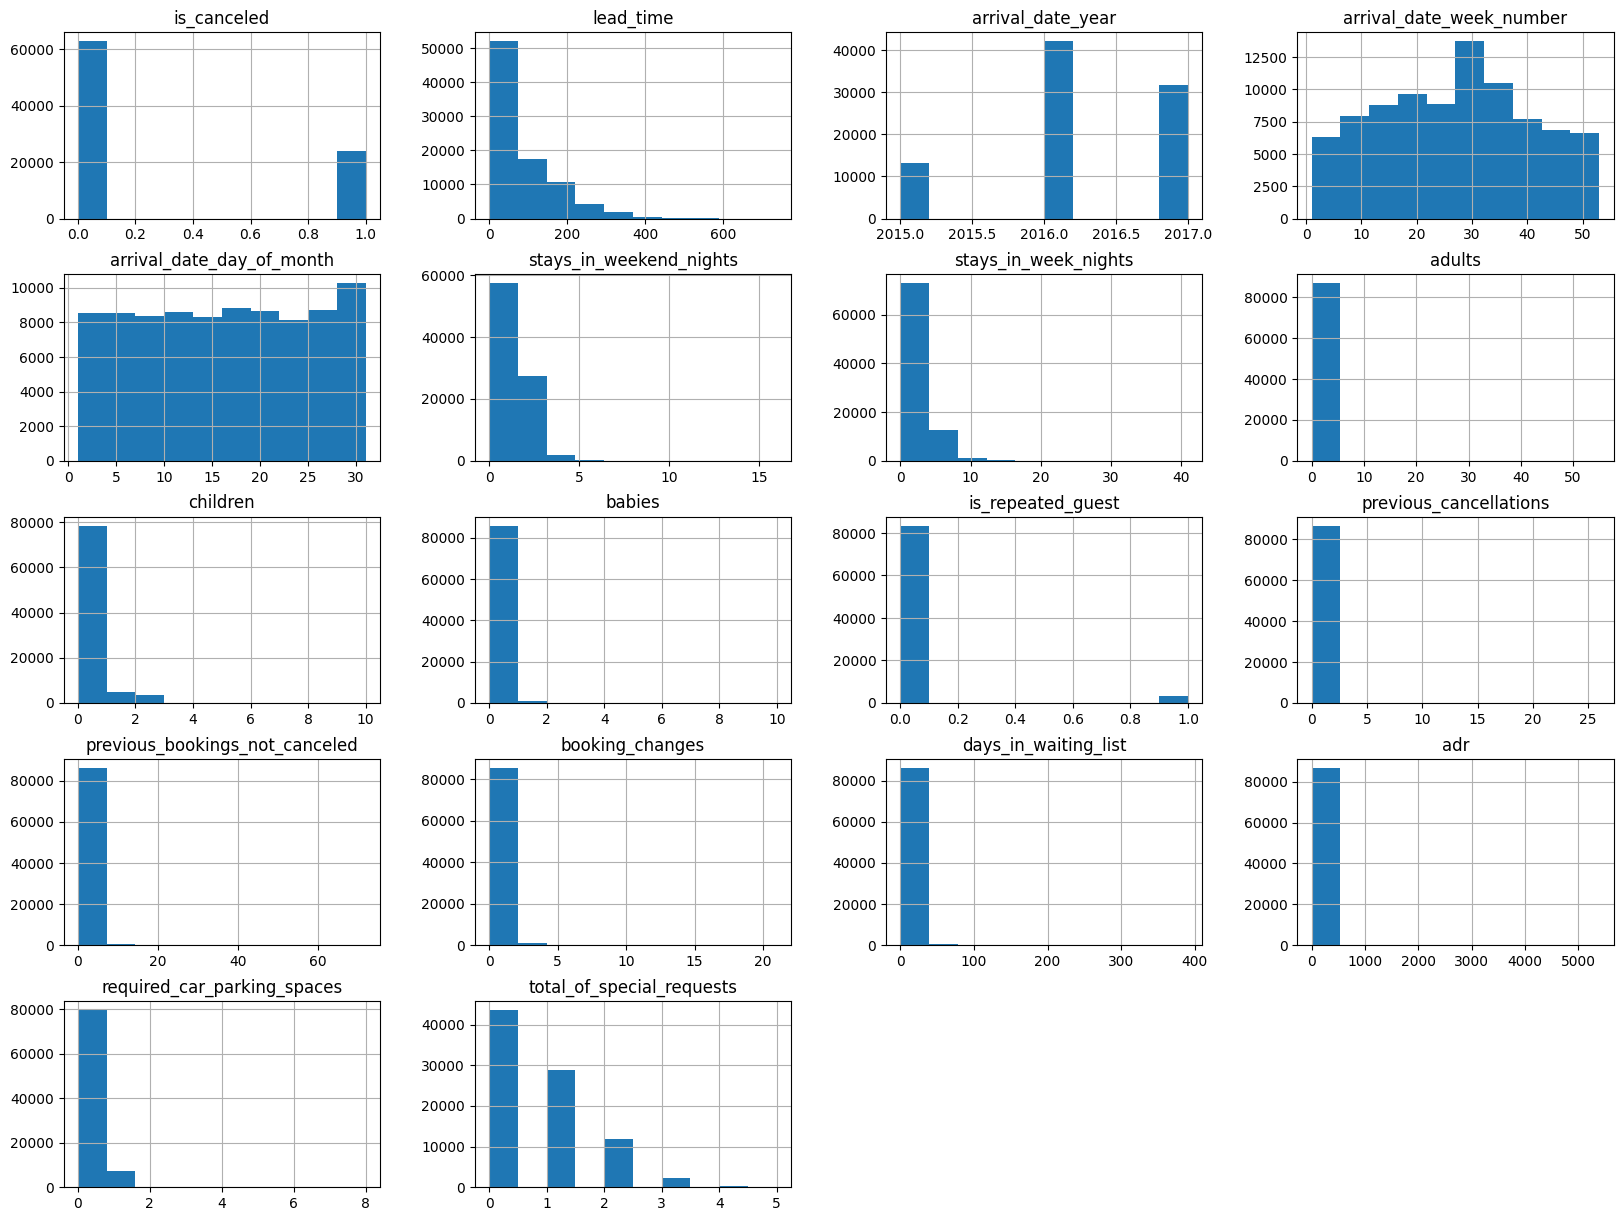

In [ ]:
hotel_df.hist(figsize=(20,15))
plt.show()

Observations:
From the histogram above, some insights found from the chart are:


1. We can see maximum guests come in the year 2016
2. Maximum arrival happens in the last of the month.
3. There is a very less requirement of car parking.
4. Maximum guests come with no children.





From the above graph, it can  be summarized that in the year 2016 both the hotel saw massive increase and by far in the year 2016 is the year of highest booking of both hotels.
In the year 2015,2016 and 2017, the city hotel is having the highest number of bookings.





#**7**.Year and Hotel wise confirmed booking and cancellation Distribution

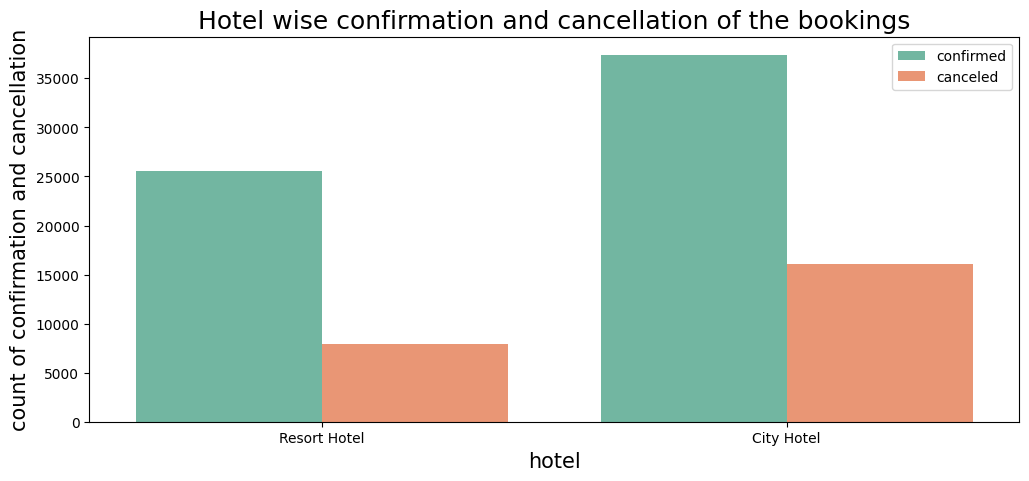

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x="hotel",hue="is_canceled", palette="Set2", data=hotel_df)
plt.legend(['confirmed','canceled'])
plt.title('Hotel wise confirmation and cancellation of the bookings', fontsize=18)
plt.ylabel('count of confirmation and cancellation',fontsize=15)
plt.xlabel('hotel',fontsize=15)
plt.show()

It can be seen from the above graph that City hotels have greater number of bookings as compared to Resort hotels.
cancellation percentage is also higher in City hotel as compared to Resort hotel.


#**8**.Which type of meal is most preferred by guest?

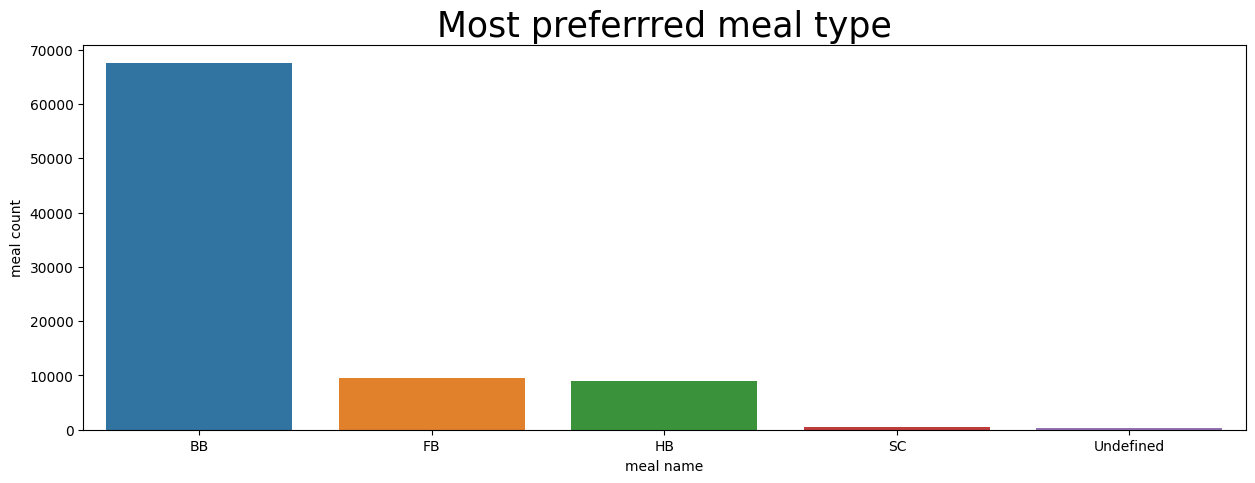

In [ ]:
meal_count=hotel_df.meal.value_counts()
meal_name=hotel_df['meal'].unique()
meal_df=pd.DataFrame(zip(meal_name,meal_count),columns=['meal name','meal count'])
plt.figure(figsize=(15,5))
g=sns.barplot(data=meal_df, x='meal name',y='meal count')
g.set_xticklabels(meal_df['meal name'])
plt.title('Most preferrred meal type',fontsize=25)
plt.show()

**Meal** **Type** **Variable** **Description**

*   BB=Bed and Breakfast
*   FB=Full Board
*   HB=Half Board
*   SC=Self Catering









**Observation:**


After Visualizing the above chart, we can see that BB is the most preferred meal type by guests.
Stakeholders know that BB(Bed and Breakfast) is the most preferred meal type so they can arrange raw material for this meal in advanvce and deliver the meal without any delay.



#**9**. Chart Corelation Heatmap

<ipython-input-49-aa886faa988e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hotel_df.corr(),annot=True,cbar_kws=({'label': 'Scale'}))


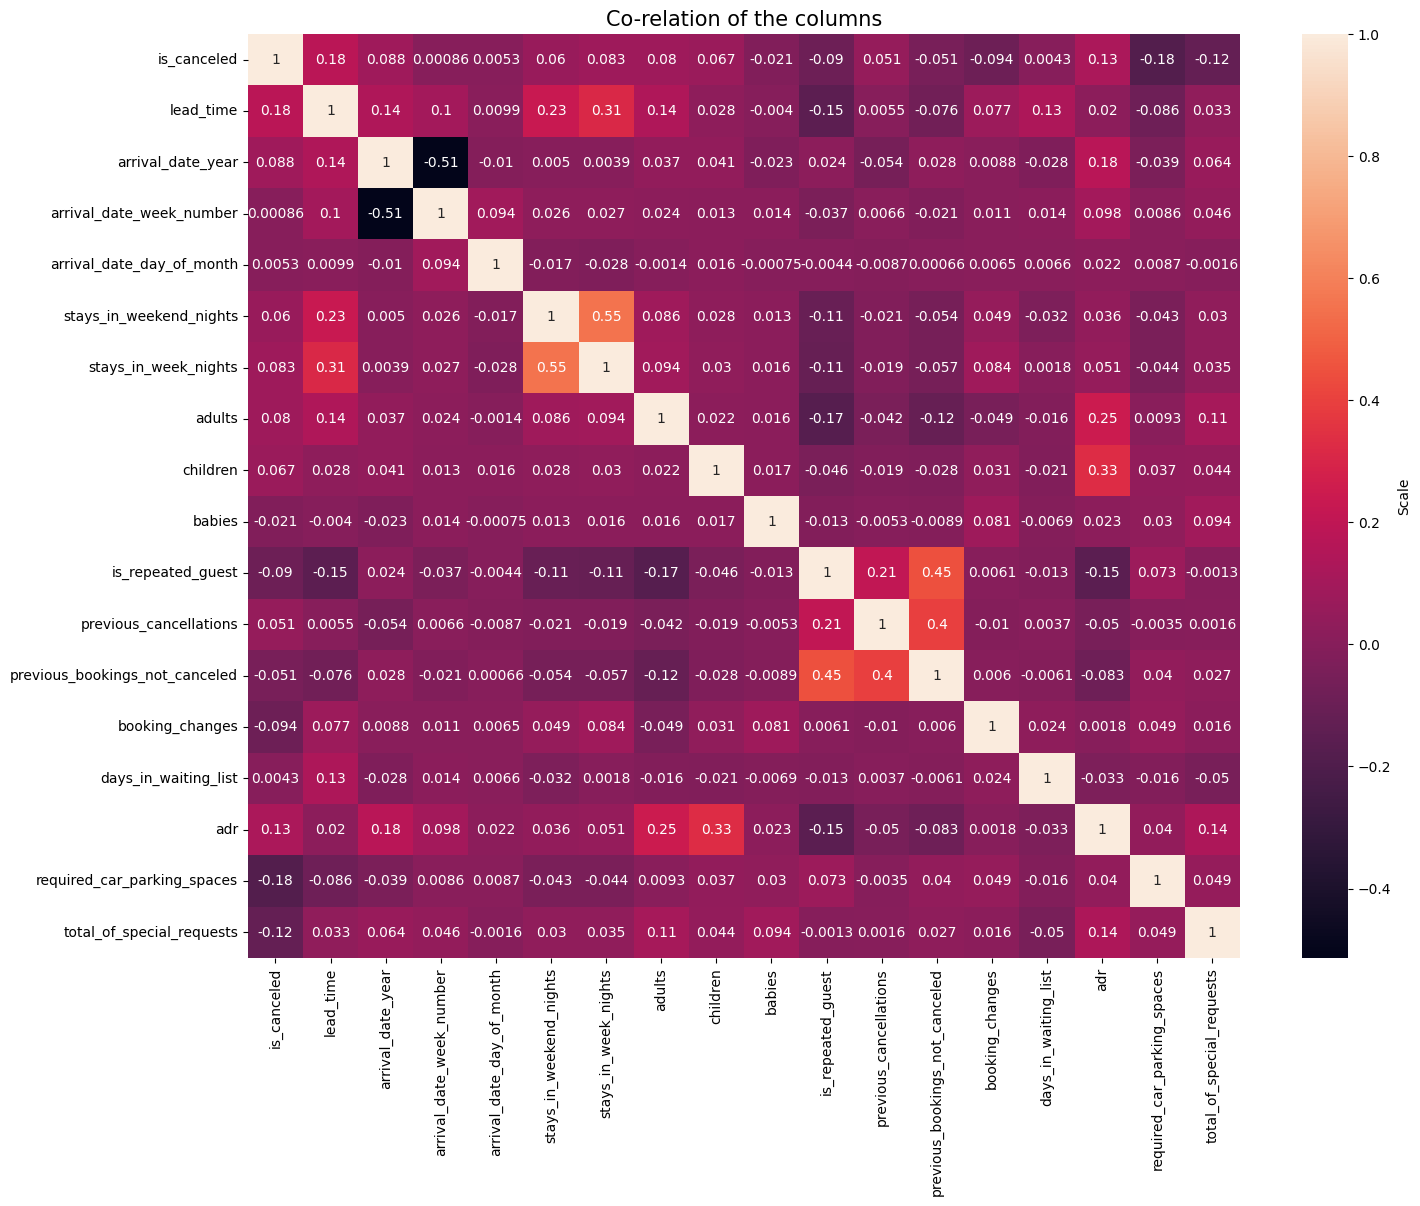

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(hotel_df.corr(),annot=True,cbar_kws=({'label': 'Scale'}))
plt.title('Co-relation of the columns',fontsize=15)
plt.show()

**Observation:** From the above visualization,following insights may be found from the chart:

1.   lead_time and total_stay is positively corelated,it means if guests stay more than the lead time,it increases.
1.   adults,children and babies are corelated to each other, it means more the guests the more is the adr.
2.   is_repeated guests and previous_bookings_not_canceled has strong corelation,it means repeated guests don't cancel their bookings.









#**10**. Which hotel type has the highest ADR?

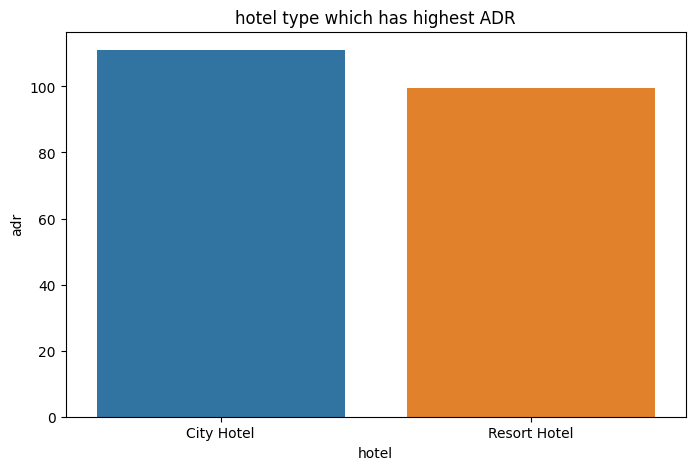

In [ ]:
grup_by_hotel=hotel_df.groupby('hotel')
highest_adr=grup_by_hotel['adr'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x= highest_adr['hotel'], y=highest_adr['adr'])
plt.title("hotel type which has highest ADR")
plt.show()


# observation

City hotel has the highest ADR. That means city hotel are genrating more revenues than the resort hotel.

#**11**. Which hotel type has more lead time?

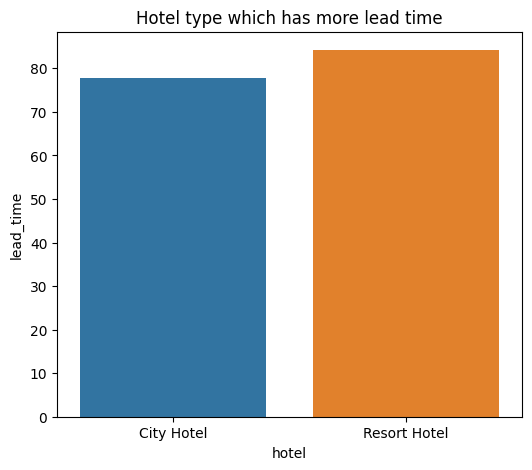

In [ ]:
grup_by_hotel=hotel_df.groupby('hotel')
lead_time=grup_by_hotel['lead_time'].mean().reset_index()
plt.figure(figsize=(6,5))
plt.xlabel('Hotel type')
plt.ylabel('lead_time')
sns.barplot(x= lead_time['hotel'], y=lead_time['lead_time'])
plt.title("Hotel type which has more lead time")
plt.show()

**Observation:**
From the above visualization it can be seen that city hotel has more lead time.



#**12**.Which month have highest booking?

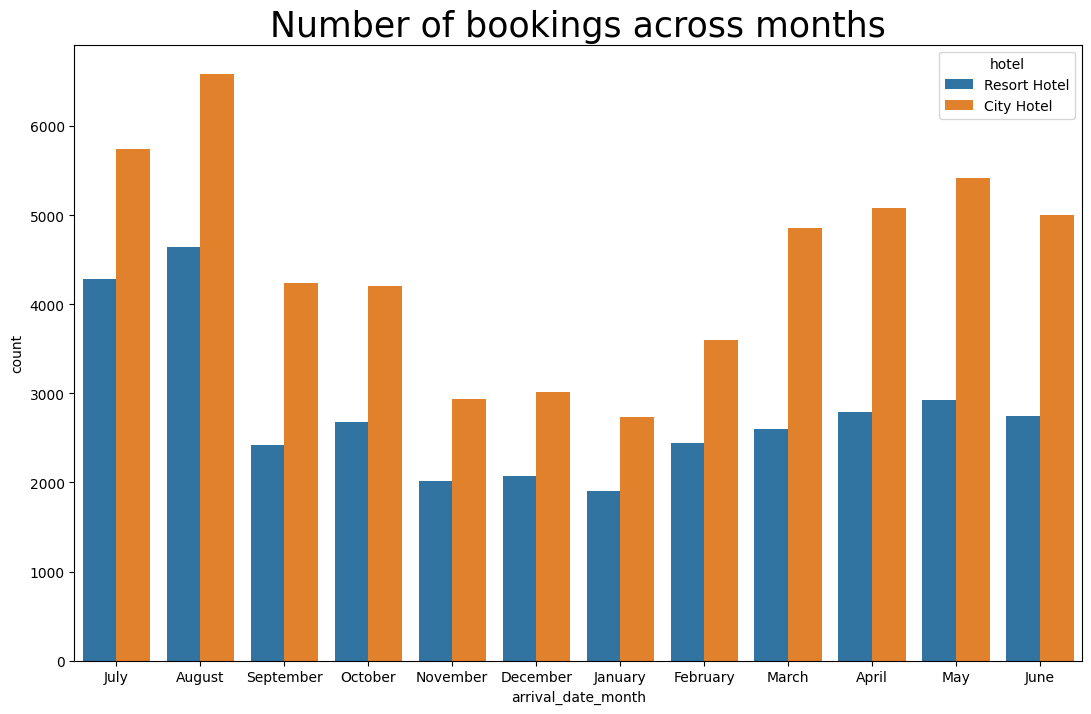

In [ ]:
plt.figure(figsize=(13,8))
sns.countplot(x=hotel_df['arrival_date_month'],hue=hotel_df['hotel'])
plt.title("Number of bookings across months",fontsize=25)
plt.show()

## obseravtion

From the above visualization we found that August and July were two most busy months in comparison to others.

#**13**. Which Hotel has the longer waiting time?

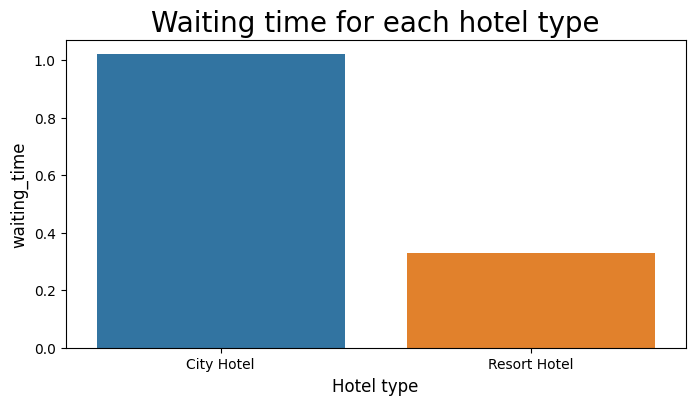

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#Grouping by hotel and taking the mean of days in waiting list
waiting_time_df=hotel_df.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
#Setting the plot size
plt.figure(figsize=(8,4))
#Plotting the barchart
sns.barplot(x=waiting_time_df['hotel'],y=waiting_time_df['days_in_waiting_list'])
#Setting the labels
plt.xlabel('Hotel type',fontsize=12)
plt.ylabel('waiting_time',fontsize=12)
plt.title('Waiting time for each hotel type',fontsize=20)
plt.show()

**Observation:**
From the above chart it can be seen that City hotel has more waiting period. This could be because people stay more in City hotel.
Stakeholders should increase rooms in City hotel or convert some rooms of Resort hotel into City hotel to decrease the waiting time.





#**14**.Hotel with most repeated guests.

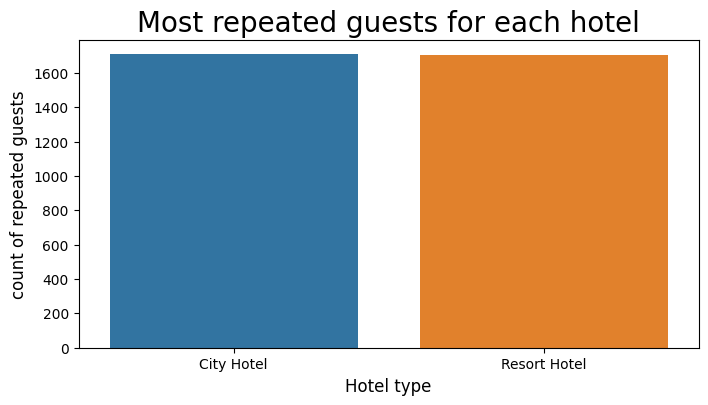

In [ ]:
rep_guests=hotel_df[hotel_df['is_repeated_guest']==1].groupby('hotel').size().reset_index()
#renaming the column
rep_guest=rep_guests.rename(columns={0:'number_of_repeated_guests'})
#Setting the chart size
plt.figure(figsize=(8,4))
#Plotting the values in a bar chart
sns.barplot(x=rep_guest['hotel'],y=rep_guest['number_of_repeated_guests'])
#Setting the labels and title
plt.xlabel('Hotel type',fontsize=12)
plt.ylabel('count of repeated guests',fontsize=12)
plt.title('Most repeated guests for each hotel',fontsize=20)
#Show chart
plt.show()

**Observation:**
From the above visualization we can see that Resort Hotel has slightly more repeated guests over City Hotel. This could be because of less waiting time in Resort Hotel and better service there because of less rush.



#**15**. Which hotel makes most revenue?

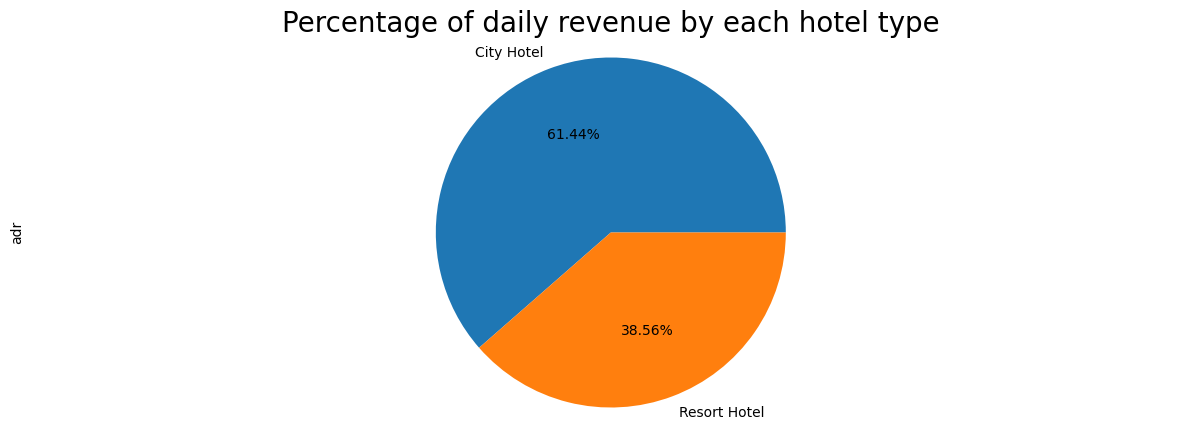

In [ ]:
#Counting the revenue for each hotel type using groupby function
most_rev=hotel_df.groupby('hotel')['adr'].count()
#Plotting the values in a pie chart
most_rev.plot.pie(autopct='%1.2f%%',figsize=(15,5))
#Setting the title
plt.title('Percentage of daily revenue by each hotel type',fontsize=20)
plt.axis('equal')
#Show the chart
plt.show()

**Observation:**
From the above chart it is clear that City hotel has more share in revenue generation over Resort hotel.
Stakeholders should improve the service of Resort hotel so that people stay more in resort hotel and increase the revenue.





#**Conclusion:**
1. The guest showed a preference for city hotels, making it the busiest type of hotel.
2. City hotel is most preferred hotel by guests.
3. Resort Hotels had the highest number of repeated guests.
4. Repeated guests are very less which is only 3.6% while 96.4% guests are not returning to the same hotel.
5. Hotels was booked mostly in the year 2016 and it was least in the year 2015.
6.In the year 2016 is the year of highest booking of both hotels. In the year 2015,2016 and 2017, the city hotel is having the highest number of bookings.   
7. We can see that Bed and Breakfast is the most preferred meal type by guests.   
8. City Hotel has the highest ADR.
9. It can be seen that city hotel has more lead time.   
10. August and July were two most busy months in comparison to others.
11. City hotel has longer waiting time.
12. Resort Hotel has slightly more repeated guests over City Hotel.
13.City hotel has more share in revenue generation over Resort hotel.









